In [12]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


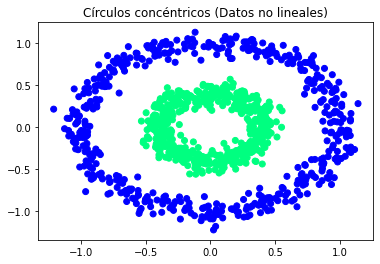

In [13]:

# Generar dataset con círculos concéntricos
# El parámetro factor controla el tamaño relativo de los dos círculos 
# y noise introduce un poco de ruido aleatorio en los datos.
X, y = make_circles(n_samples=1000, factor=0.4, noise=0.07)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Visualizar los datos para ver la distribución no lineal
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.title("Círculos concéntricos (Datos no lineales)")
plt.show()


Matriz de confusión (Kernel Lineal):


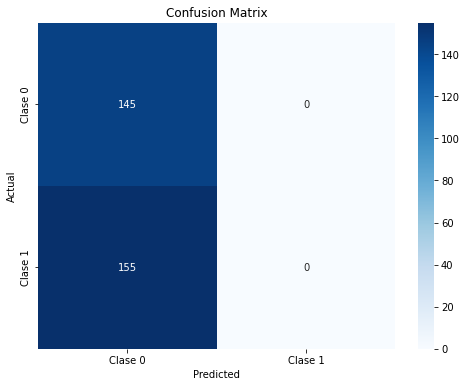


Informe de clasificación (Kernel Lineal):
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       145
           1       0.00      0.00      0.00       155

    accuracy                           0.48       300
   macro avg       0.24      0.50      0.33       300
weighted avg       0.23      0.48      0.31       300



c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\leli_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [14]:
# Crear y entrenar un modelo SVM con kernel lineal
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Predicciones y evaluación con kernel lineal
y_pred_linear = linear_svm.predict(X_test)
print("Matriz de confusión (Kernel Lineal):")

# Suponiendo que ya tenemos y_test y y_pred (valores reales y predichos)
conf_matrix = confusion_matrix(y_test, y_pred_linear)

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))  # Ajustar el tamaño del gráfico a 8x6 pulgadas
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'])  # Cambiar etiquetas según las clases
plt.xlabel('Predicted')  # Etiqueta del eje X: Predicciones
plt.ylabel('Actual')  # Etiqueta del eje Y: Valores Reales
plt.title('Confusion Matrix')  # Título de la gráfica
plt.show()  # Mostrar el gráfico

print("\nInforme de clasificación (Kernel Lineal):")
print(classification_report(y_test, y_pred_linear))


In [ ]:

# Crear y entrenar un modelo SVM con kernel RBF (no lineal)
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)

# Predicciones y evaluación con kernel RBF
y_pred_rbf = rbf_svm.predict(X_test)
print("Matriz de confusión (Kernel RBF):")
print(confusion_matrix(y_test, y_pred_rbf))
print("\nInforme de clasificación (Kernel RBF):")
print(classification_report(y_test, y_pred_rbf))
